In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Explorer data analysis and visualization by extracting the sample data it using pandas and matplotlib

Extracting and analyzing the weather dataset involving the analysis of :

> temperature is lesser than 15° above 0°


> extracting average temperature of the sample data set


> extracting the normal median temperature of the sample data set


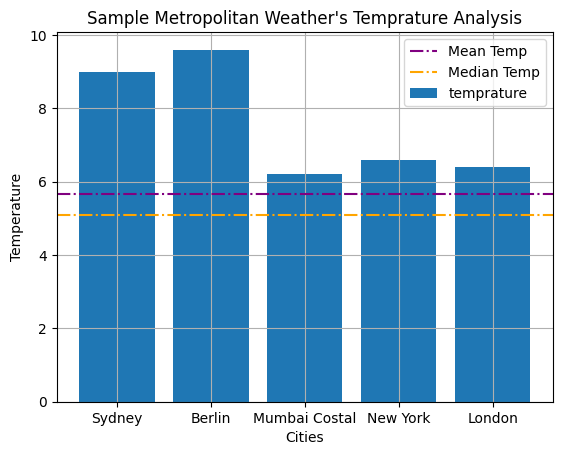

In [3]:
import numpy as np
df=pd.read_csv("weather_df.csv")
df=df.loc[
    (df['Temperature_C']<15)&(df['Temperature_C']>0),
     ['Date','City','Wind_Speed_kmh','Temperature_C','Humidity_%']
    ]
humidity=(21+28)/2
mean_temp=df['Temperature_C'].mean()
mode_temp=df['Temperature_C'].mode()
median_temp=df['Temperature_C'].median()
df['Humidity_%']=df['Humidity_%'].fillna(humidity)
df=df.loc[df['Temperature_C']>df['Temperature_C'].median()]
df['Wind_Speed_kmh']=df['Wind_Speed_kmh'].fillna(df['Wind_Speed_kmh'].median())
df['City']=df['City'].replace({'Mumbai':'Mumbai Costal'})
df=df.drop_duplicates(subset=['City'],keep="first")
xloop=np.arange(len(df['City']))
plt.xticks(xloop,df['City'])
plt.bar(xloop,df['Temperature_C'],label="temprature")
plt.axhline(y=mean_temp,color='purple',linestyle='-.',label="Mean Temp")
plt.axhline(y=median_temp,color='orange',linestyle='-.',label="Median Temp")
plt.xlabel("Cities")
plt.ylabel("Temperature")
plt.title("Sample Metropolitan Weather's Temprature Analysis")
plt.legend()
plt.grid()
plt.show()

Explorer data analysis by involving the extraction and analysis of the sample data set having :


> Analyzing Wind speed to Temperrature analysis



> Covering up all the na values of Temperature and Wind Speed


> Windspeed Greater then 3kmph and lesser then 30kmph


> temperature greater than 0°C and less lesser than 30°C

/tmp/ipython-input-1539668546.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temperature_C']=df['Temperature_C'].fillna(method='ffill',limit=2)
/tmp/ipython-input-1539668546.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temperature_C']=df['Temperature_C'].fillna(method='bfill',limit=2)
/tmp/ipython-input-1539668546.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Wind_Speed_kmh']=df['Wind_Speed_kmh'].fillna(method='ffill',limit=1)
/tmp/ipython-input-1539668546.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Wind_Speed_kmh']=df['Wind_Speed_kmh'].fillna(method='bfill',limit=1)


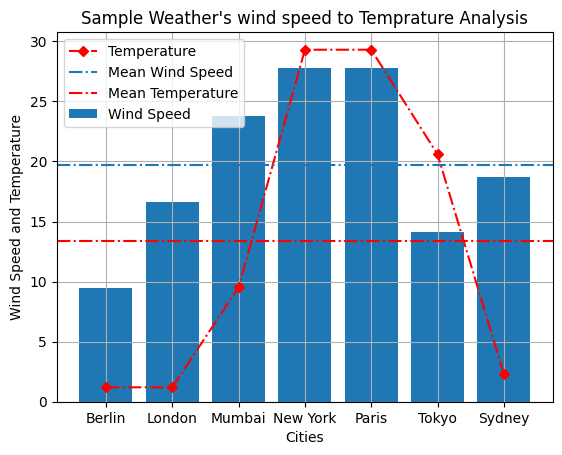

In [5]:
df=pd.read_csv("weather_df.csv")
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head(15)
temp_mean=df['Temperature_C'].mean()
humid_mean=df['Humidity_%'].mean()
wind_mean=df['Wind_Speed_kmh'].mean()
df['Temperature_C']=df['Temperature_C'].fillna(method='ffill',limit=2)
df['Temperature_C']=df['Temperature_C'].fillna(method='bfill',limit=2)
df['Temperature_C']=df['Temperature_C'].interpolate(method='time')
df['Temperature_C']=df['Temperature_C'].fillna(temp_mean)
df['Wind_Speed_kmh']=df['Wind_Speed_kmh'].fillna(method='ffill',limit=1)
df['Wind_Speed_kmh']=df['Wind_Speed_kmh'].fillna(method='bfill',limit=1)
df['Wind_Speed_kmh']=df['Wind_Speed_kmh'].interpolate(method='time')
df['Wind_Speed_kmh']=df['Wind_Speed_kmh'].fillna(wind_mean)
df.head(15)
df=df.loc[(df['Wind_Speed_kmh']>3)&(df['Wind_Speed_kmh']<30),['City','Wind_Speed_kmh','Temperature_C']]
df=df.loc[(df['Temperature_C']>0)&(df['Temperature_C']<30)]
df.drop_duplicates(subset=['City'],keep="first",inplace=True)
wind_mean=df['Wind_Speed_kmh'].mean()
temp_mean=df['Temperature_C'].mean()
x_axis=np.arange(len(df['City']))
plt.xticks(x_axis,df['City'])
plt.bar(x_axis,df['Wind_Speed_kmh'],label="Wind Speed")
plt.plot(x_axis,df['Temperature_C'],'rD-.',markersize=5,label="Temperature")
plt.axhline(wind_mean,label="Mean Wind Speed",linestyle='-.')
plt.axhline(temp_mean,label="Mean Temperature",linestyle='-.',color='red')
plt.xlabel("Cities")
plt.ylabel("Wind Speed and Temperature")
plt.title("Sample Weather's wind speed to Temprature Analysis")
plt.legend()
plt.grid()